In [60]:
# Import libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [47]:
## 10-year US Treasury Note

# Read CSV
Tnote_df = pd.read_csv('/Users/faisalhossain/PycharmProjects/Miami-ML/data/10yr-t-note.csv')

# Format data
Tnote_df.replace(to_replace="ND", value=np.nan, inplace=True)
Tnote_df["Market Yield"] = pd.to_numeric(Tnote_df["Market Yield"])
Tnote_df['Date'] = pd.to_datetime(Tnote_df['Date']).dt.date

Tnote_df.head

<bound method NDFrame.head of             Date  Market Yield
0     2000-01-31          6.68
1     2000-02-01          6.62
2     2000-02-02          6.60
3     2000-02-03          6.49
4     2000-02-04          6.53
...          ...           ...
5953  2022-11-24           NaN
5954  2022-11-25          3.68
5955  2022-11-28          3.69
5956  2022-11-29          3.75
5957  2022-11-30          3.68

[5958 rows x 2 columns]>

In [48]:
Tnote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5958 non-null   object 
 1   Market Yield  5713 non-null   float64
dtypes: float64(1), object(1)
memory usage: 93.2+ KB


In [65]:
# Identify Null Values
null_df = Tnote_df[Tnote_df.isna().any(axis=1)]
null_df

# Null value perctange
(len(null_df.index) / len(Tnote_df.index)) * 100

,Date,Market Yield
15,2000-02-21,NaN
59,2000-04-21,NaN
85,2000-05-29,NaN
111,2000-07-04,NaN
155,2000-09-04,NaN
...,...,...
5850,2022-07-04,NaN
5895,2022-09-05,NaN
5920,2022-10-10,NaN
5944,2022-11-11,NaN


4.11211816045653

In [59]:
# Describe Market Yield
Tnote_df["Market Yield"].describe()

count    5713.000000
mean        3.200816
std         1.323940
min         0.520000
25%         2.130000
50%         2.980000
75%         4.250000
max         6.680000
Name: Market Yield, dtype: float64

In [67]:
# Date Range
print(min(Tnote_df["Date"]))
print(max(Tnote_df["Date"]))

2000-01-31
2022-11-30


Text(0.5, 1.0, '10-year US Treasury Note')

Text(0, 0.5, 'Market Yield')

Text(0.5, 0, 'Date')

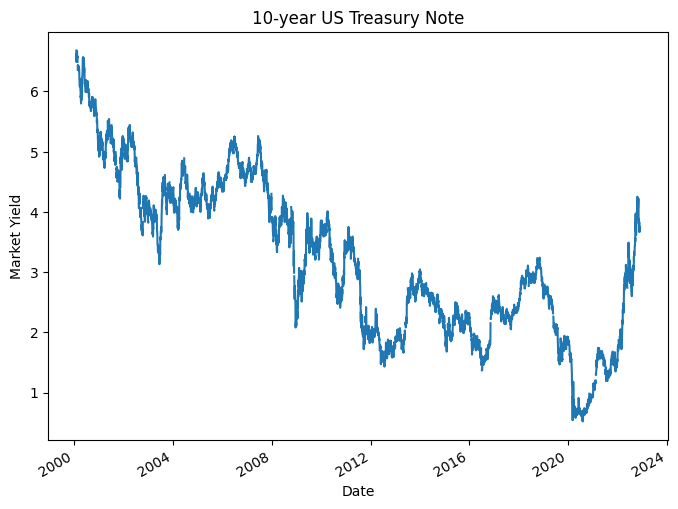

In [83]:
# Plot 10-year US Treasury Note
import matplotlib.dates as mdates

date = Tnote_df.Date
value = Tnote_df['Market Yield']

fig, ax = plt.subplots(figsize=(8, 6))

plt.title('10-year US Treasury Note')
plt.ylabel('Market Yield')
plt.xlabel('Date')

ax.plot(date, value)

# Rotates and right aligns the x labels. 
# Also moves the bottom of the axes up to make room for them.
fig.autofmt_xdate()

In [78]:
## Condos CSV

# Read CSV
condos_df = pd.read_csv('/Users/faisalhossain/PycharmProjects/Miami-ML/data/condos.csv')
del condos_df["StateName"]
miami_condos_df = condos_df[condos_df["Metro"] == "Miami-Fort Lauderdale-West Palm Beach"]

miami_condos_df.head(5)

,RegionID,SizeRank,RegionName,RegionType,State,City,Metro,CountyName,1/31/00,2/29/00,...,9/30/21,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22
121,124381,134,Flagami,Neighborhood,FL,Miami,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,75689.0,76063.0,...,182571.0,185374.0,188026.0,190355.0,193537.0,196396.0,199930.0,202928.0,208014.0,213124
127,269072,142,Little Havana,Neighborhood,FL,Miami,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,85415.0,85603.0,...,186930.0,189428.0,192445.0,195758.0,199807.0,202847.0,206413.0,208877.0,213941.0,219143
172,269228,190,Alameda - West Flagler,Neighborhood,FL,Miami,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,95084.0,95268.0,...,199807.0,203616.0,207055.0,210996.0,214659.0,217837.0,220257.0,222513.0,227527.0,233381
198,123423,220,Allapattah,Neighborhood,FL,Miami,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,108714.0,108565.0,...,174923.0,177794.0,180321.0,182751.0,186486.0,189622.0,193846.0,197279.0,203645.0,209279
218,268938,240,Coral Way,Neighborhood,FL,Miami,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,122942.0,123113.0,...,284164.0,289149.0,294029.0,299379.0,305622.0,310966.0,317094.0,323029.0,332180.0,342727


In [86]:
# Condo Price Data
price_df = miami_condos_df.iloc[:, 8:]
price_df.head(5)

price_df_T = price_df.T
price_df_T.columns = price_df_T.columns.astype(str)
price_df_T.insert(0, "Date", price_df.columns.values.tolist())
price_df_T.Date = pd.to_datetime(price_df_T.Date).dt.date
price_df_T.head(5)

,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,9/30/00,10/31/00,...,9/30/21,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22
121,75689.0,76063.0,76690.0,77655.0,78405.0,79056.0,79595.0,80099.0,80341.0,80600.0,...,182571.0,185374.0,188026.0,190355.0,193537.0,196396.0,199930.0,202928.0,208014.0,213124
127,85415.0,85603.0,85886.0,86331.0,86751.0,87277.0,87343.0,87229.0,86676.0,86887.0,...,186930.0,189428.0,192445.0,195758.0,199807.0,202847.0,206413.0,208877.0,213941.0,219143
172,95084.0,95268.0,95417.0,95860.0,96294.0,97137.0,97671.0,98014.0,97868.0,97803.0,...,199807.0,203616.0,207055.0,210996.0,214659.0,217837.0,220257.0,222513.0,227527.0,233381
198,108714.0,108565.0,108081.0,107949.0,107051.0,106962.0,106217.0,105962.0,105361.0,105426.0,...,174923.0,177794.0,180321.0,182751.0,186486.0,189622.0,193846.0,197279.0,203645.0,209279
218,122942.0,123113.0,122901.0,122840.0,122568.0,123147.0,123644.0,124298.0,124538.0,125426.0,...,284164.0,289149.0,294029.0,299379.0,305622.0,310966.0,317094.0,323029.0,332180.0,342727


,Date,121,127,172,198,218,268,311,422,426,...,3978,3985,3989,4009,4052,4062,4116,4123,4125,4129
1/31/00,2000-01-31,75689.0,85415.0,95084.0,108714.0,122942.0,49521.0,NaN,214705.0,NaN,...,NaN,NaN,NaN,NaN,63332.0,371794.0,350706.0,NaN,160786.0,NaN
2/29/00,2000-02-29,76063.0,85603.0,95268.0,108565.0,123113.0,49703.0,NaN,215467.0,NaN,...,NaN,NaN,NaN,NaN,63760.0,371035.0,351808.0,NaN,160828.0,NaN
3/31/00,2000-03-31,76690.0,85886.0,95417.0,108081.0,122901.0,49833.0,NaN,216207.0,NaN,...,NaN,NaN,NaN,NaN,64213.0,371213.0,352549.0,NaN,160791.0,NaN
4/30/00,2000-04-30,77655.0,86331.0,95860.0,107949.0,122840.0,49993.0,NaN,217773.0,NaN,...,NaN,NaN,NaN,NaN,65000.0,372567.0,353750.0,NaN,161225.0,NaN
5/31/00,2000-05-31,78405.0,86751.0,96294.0,107051.0,122568.0,50169.0,NaN,219102.0,NaN,...,NaN,NaN,NaN,NaN,66315.0,375979.0,357318.0,NaN,162305.0,NaN


In [87]:
# Index 121
index_121_df = pd.DataFrame(columns=['Date', 'Price'])
index_121_df.Date = price_df_T['Date']
index_121_df.Price = price_df_T["121"]
index_121_df = index_121_df.reset_index(drop=True)
index_121_df.head(10)

,Date,Price
0,2000-01-31,75689.0
1,2000-02-29,76063.0
2,2000-03-31,76690.0
3,2000-04-30,77655.0
4,2000-05-31,78405.0
5,2000-06-30,79056.0
6,2000-07-31,79595.0
7,2000-08-31,80099.0
8,2000-09-30,80341.0
9,2000-10-31,80600.0


In [93]:
Tnote_df['Date'] = pd.to_datetime(Tnote_df['Date'])
index_121_df['Date'] = pd.to_datetime(index_121_df['Date'])

In [94]:
# Merge interest rates and index 121
merged_df = pd.merge_asof(Tnote_df, index_121_df, on='Date')

In [95]:
merged_df.head(20)

,Date,Market Yield,Price
0,2000-01-31,6.68,75689.0
1,2000-02-01,6.62,75689.0
2,2000-02-02,6.60,75689.0
3,2000-02-03,6.49,75689.0
4,2000-02-04,6.53,75689.0
5,2000-02-07,6.64,75689.0
6,2000-02-08,6.59,75689.0
7,2000-02-09,6.56,75689.0
8,2000-02-10,6.67,75689.0
9,2000-02-11,6.63,75689.0


Text(0.5, 1.0, 'Index 121 & Interest Rate')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Price')

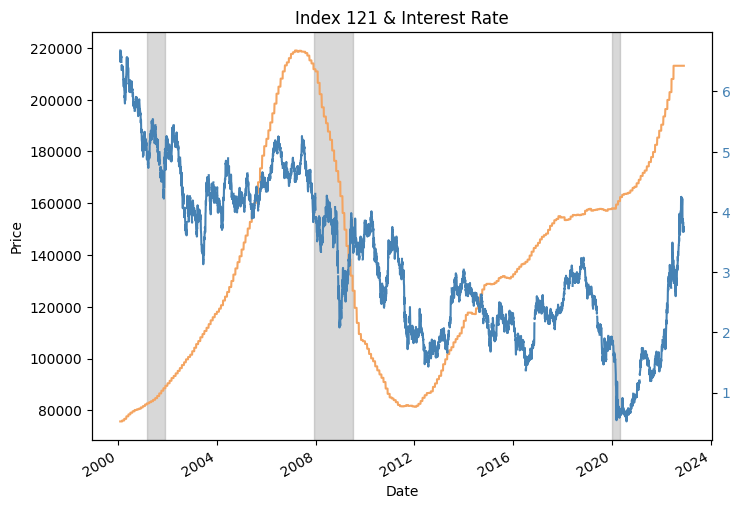

In [107]:
# Plot Merged
from datetime import datetime
from matplotlib.dates import date2num

fig, ax = plt.subplots(figsize=(8, 6))

plt.title('Index 121 & Interest Rate')
plt.xlabel('Date')
plt.ylabel('Price')

# Early 2000s Recession
ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,30)), 
           label="Early 2000s Recession",color="grey", alpha=0.3)
# Great Recession
ax.axvspan(date2num(datetime(2007,12,1)), date2num(datetime(2009,6,30)), 
           label="Great Recession",color="grey", alpha=0.3)
# COVID-19 Recession
ax.axvspan(date2num(datetime(2020,1,2)), date2num(datetime(2020,4,30)), 
           label="COVID-19 Recession",color="grey", alpha=0.3)

# Rotates and right aligns the x labels. 
# Also moves the bottom of the axes up to make room for them.
fig.autofmt_xdate()

# ax.plot(merged_df.Date, merged_df["Market Yield"])
# ax.plot(merged_df.Date, merged_df.Price)

# Plot linear sequence, and set tick labels to the same color
plot_color = 'sandybrown'
ax.plot(merged_df.Date, merged_df.Price, color=plot_color)
ax.tick_params(axis='y', labelcolor="black")

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
plot_color = 'steelblue'
ax2.plot(merged_df.Date, merged_df["Market Yield"], color=plot_color)
ax2.tick_params(axis='y', labelcolor=plot_color)

plt.show()

In [113]:
merged_df.corr()


/var/folders/r_/sjt23m8d27j4fxz1393mx2900000gn/T/ipykernel_29646/1851959213.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,Market Yield,Price
Market Yield,1.000000,-0.086278
Price,-0.086278,1.000000
